# Visualize all prediction accuracies from empirical analyses

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import os
os.environ['OMP_NUM_THREADS'] = str(1)
import statsmodels.sandbox.stats.multicomp as mc
import seaborn as sns
import h5py
import tools
import nibabel as nib
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Arial"
import pandas as pd
import time
from importlib import reload

In [3]:
datadir = '../../data/results/MAIN/srModelPredictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'FC shuffling', 'No ReLU',
          'Context lesion',
          'No hidden']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# Motor decoding
rh = np.loadtxt(datadir + 'BaselineMotorDecoding/RH_decoding_noncirc.txt')*100.0
lh = np.loadtxt(datadir + 'BaselineMotorDecoding/LH_decoding_noncirc.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Motor decoding')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Motor decoding')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R Model 
rh = np.loadtxt(datadir + 'SRActFlowFull/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no hidden layer
rh = np.loadtxt(datadir + 'SRActFlowNoHidden/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowNoHidden/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('No hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('No hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no hidden layer
rh = np.loadtxt(datadir + 'SRActFlowRandomizedHidden/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowRandomizedHidden/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Random hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Random hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no threshold (null)
rh = np.loadtxt(datadir + 'SRActFlowNoReLU/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowNoReLU/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('No ReLU')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('No ReLU')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model context lesion
rh = np.loadtxt(datadir + 'SRActFlowContextLesion/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowContextLesion/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Context lesion')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Context lesion')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R connectivity shuffling (null)
rh = np.loadtxt(datadir + 'SRActFlowShuffleFC/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowShuffleFC/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('FC shuffling')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('FC shuffling')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
    
df_acc = pd.DataFrame(data=acc_dict)

In [5]:
datadir = '../../data/results/MAIN/srModelPredictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'FC shuffling', 'No ReLU',
          'Context lesion',
          'No hidden']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# Motor decoding
rh = np.loadtxt(datadir + 'BaselineMotorDecoding/RH_null_decoding_noncirc.txt')*100.0
lh = np.loadtxt(datadir + 'BaselineMotorDecoding/LH_null_decoding_noncirc.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Motor decoding')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Motor decoding')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R Model 
rh = np.loadtxt(datadir + 'SRActFlowFull/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no hidden layer
rh = np.loadtxt(datadir + 'SRActFlowNoHidden/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowNoHidden/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('No hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('No hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no hidden layer
rh = np.loadtxt(datadir + 'SRActFlowRandomizedHidden/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowRandomizedHidden/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Random hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Random hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no threshold (null)
rh = np.loadtxt(datadir + 'SRActFlowNoReLU/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowNoReLU/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('No ReLU')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('No ReLU')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model context lesion
rh = np.loadtxt(datadir + 'SRActFlowContextLesion/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowContextLesion/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Context lesion')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Context lesion')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R connectivity shuffling (null)
rh = np.loadtxt(datadir + 'SRActFlowShuffleFC/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowShuffleFC/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('FC shuffling')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('FC shuffling')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
    
df_acc_null = pd.DataFrame(data=acc_dict)

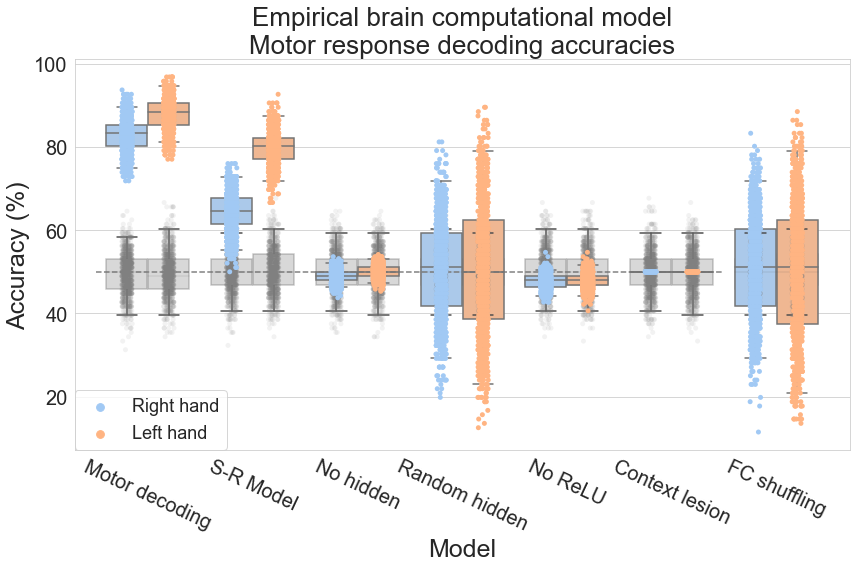

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
           medianprops={'linestyle':'-','alpha':0.1},sym='',whis=[2.5,97.5],palette=['grey','grey'], boxprops=dict(alpha=.3))
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
              dodge=True,alpha=0.1,palette=['grey','grey'])
ax = sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
              dodge=True,palette="pastel")
plt.plot(np.arange(-0.5, 6.5),np.repeat(50.0,7),'grey',linestyle='--',label='Chance - 50%')
plt.xticks(rotation=-25,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Model', fontsize=25)
plt.title('Empirical brain computational model\nMotor response decoding accuracies', fontsize=26)
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[-2:], labels[-2:], loc=3, borderaxespad=0., prop={'size': 18})
plt.tight_layout()
plt.savefig('SummaryDecodingFigure.png',dpi=300)

## Perform statistical tests and print table

In [9]:
index = ['Accuracy (RH)', 'P-value (RH)', 'Accuracy (LH)', 'P-value (LH)']
df_stats = {}
#### Motor decoding
df_stats['Motor decoding'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='Motor decoding']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='Motor decoding']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='Motor decoding']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['Motor decoding'].append(round(acc_rh,2))
df_stats['Motor decoding'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='Motor decoding']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='Motor decoding']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='Motor decoding']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['Motor decoding'].append(round(acc_lh,2))
df_stats['Motor decoding'].append(pval_lh)

#### S-R Model
df_stats['S-R Model'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='S-R Model']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='S-R Model']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='S-R Model']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['S-R Model'].append(round(acc_rh,2))
df_stats['S-R Model'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='S-R Model']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='S-R Model']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='S-R Model']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['S-R Model'].append(round(acc_lh,2))
df_stats['S-R Model'].append(pval_lh)

#### No hidden
df_stats['No hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='No hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='No hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='No hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['No hidden'].append(round(acc_rh,2))
df_stats['No hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='No hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='No hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='No hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['No hidden'].append(round(acc_lh,2))
df_stats['No hidden'].append(pval_lh)

#### Random hidden
df_stats['Random hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='Random hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='Random hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='Random hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['Random hidden'].append(round(acc_rh,2))
df_stats['Random hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='Random hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='Random hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='Random hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['Random hidden'].append(round(acc_lh,2))
df_stats['Random hidden'].append(pval_lh)

#### No ReLU
df_stats['No ReLU'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='No ReLU']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='No ReLU']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='No ReLU']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['No ReLU'].append(round(acc_rh,2))
df_stats['No ReLU'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='No ReLU']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='No ReLU']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='No ReLU']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['No ReLU'].append(round(acc_lh,2))
df_stats['No ReLU'].append(pval_lh)

#### Context lesion
df_stats['Context lesion'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='Context lesion']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='Context lesion']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='Context lesion']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['Context lesion'].append(round(acc_rh,2))
df_stats['Context lesion'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='Context lesion']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='Context lesion']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='Context lesion']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['Context lesion'].append(round(acc_lh,2))
df_stats['Context lesion'].append(pval_lh)

#### FC shuffling
df_stats['FC shuffling'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='FC shuffling']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='FC shuffling']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='FC shuffling']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['FC shuffling'].append(round(acc_rh,2))
df_stats['FC shuffling'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='FC shuffling']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='FC shuffling']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='FC shuffling']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['FC shuffling'].append(round(acc_lh,2))
df_stats['FC shuffling'].append(pval_lh)


df_stats = pd.DataFrame.from_dict(df_stats, orient='index', columns=index)

df_stats


,Accuracy (RH),P-value (RH),Accuracy (LH),P-value (LH)
Motor decoding,82.87,0.000,88.10,0.000
S-R Model,64.11,0.001,79.83,0.000
No hidden,49.05,0.536,50.14,0.464
Random hidden,50.89,0.467,50.85,0.444
No ReLU,47.74,0.698,47.90,0.692
Context lesion,50.00,0.439,50.00,0.467
FC shuffling,50.90,0.446,50.39,0.480


#### p-value of S-R model relative to FC shuffling?

In [8]:
sr_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='S-R Model']
tmp_rh_null = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='FC shuffling']
acc_rh = np.mean(sr_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
print('RH:', 100.0-pval_rh*100.0, '% percentile')

sr_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='S-R Model']
tmp_lh_null = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='FC shuffling']
acc_lh = np.mean(sr_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
print('LH:', 100.0-pval_lh*100.0, '% percentile')

RH: 85.3 % percentile
LH: 97.8 % percentile


#### p-value of S-R model relative to randomized hidden layer?

In [9]:
sr_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='S-R Model']
tmp_rh_null = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='Random hidden']
acc_rh = np.mean(sr_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
print('RH:', 100.0-pval_rh*100.0, '% percentile')

sr_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='S-R Model']
tmp_lh_null = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='Random hidden']
acc_lh = np.mean(sr_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
print('LH:', 100.0-pval_lh*100.0, '% percentile')

RH: 85.2 % percentile
LH: 97.7 % percentile


___

# 10-40 hidden layers

In [10]:
datadir = '/home/ti61/f_mc1689_1/SRActFlow/data/results/MAIN/srModelPredictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'FC shuffling', 'No ReLU',
          'Context lesion',
          'No hidden']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# S-R Model 10 hidden
rh = np.loadtxt(datadir + 'SRActFlowFull/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('10 Hidden (Original)')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('10 Hidden (Original)')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 20 hidden
rh = np.loadtxt(datadir + 'SRActFlowFull_20Hidden/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull_20Hidden/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('20 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('20 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 30 hidden
rh = np.loadtxt(datadir + 'SRActFlowFull_30Hidden/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull_30Hidden/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('30 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('30 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 40 hidden
rh = np.loadtxt(datadir + 'SRActFlowFull_40Hidden/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull_40Hidden/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('40 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('40 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
    
df_acc = pd.DataFrame(data=acc_dict)

In [11]:
datadir = '/home/ti61/f_mc1689_1/SRActFlow/data/results/MAIN/srModelPredictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'FC shuffling', 'No ReLU',
          'Context lesion',
          'No hidden']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# S-R Model 10 hidden
rh = np.loadtxt(datadir + 'SRActFlowFull/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('10 Hidden (Original)')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('10 Hidden (Original)')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 20 hidden
rh = np.loadtxt(datadir + 'SRActFlowFull_20Hidden/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull_20Hidden/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('20 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('20 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 30 hidden
rh = np.loadtxt(datadir + 'SRActFlowFull_30Hidden/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull_30Hidden/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('30 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('30 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 40 hidden
rh = np.loadtxt(datadir + 'SRActFlowFull_40Hidden/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull_40Hidden/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('40 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('40 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
    
df_acc_null = pd.DataFrame(data=acc_dict)

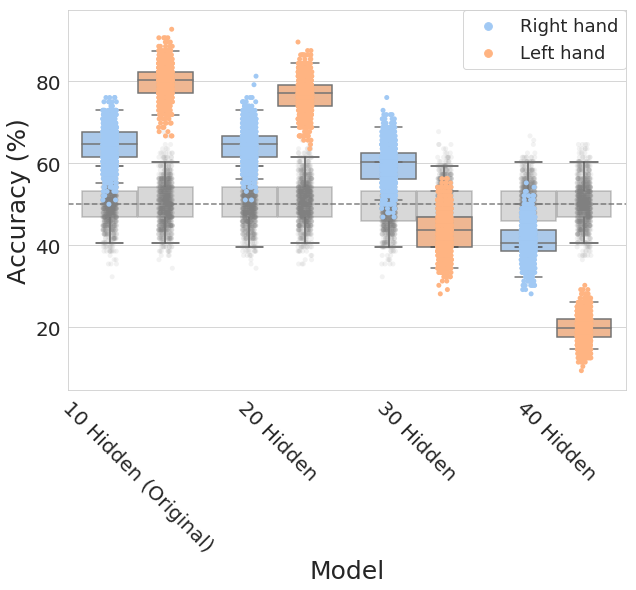

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
           medianprops={'linestyle':'-','alpha':0.1},sym='',whis=[2.5,97.5],palette=['grey','grey'], boxprops=dict(alpha=.3))
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
              dodge=True,alpha=0.1,palette=['grey','grey'])
ax = sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
              dodge=True,palette="pastel")
plt.plot(np.arange(-0.5, 4.5),np.repeat(50.0,5),'grey',linestyle='--',label='Chance - 50%')
plt.xticks(rotation=-45,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Model', fontsize=25)
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[-2:], labels[-2:], loc=1, borderaxespad=0., prop={'size': 18})

In [13]:
index = ['Accuracy (RH)', 'P-value (RH)', 'Accuracy (LH)', 'P-value (LH)']
df_stats = {}
#### 10 Hidden (Original)
df_stats['10 Hidden (Original)'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='10 Hidden (Original)']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='10 Hidden (Original)']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='10 Hidden (Original)']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['10 Hidden (Original)'].append(acc_rh)
df_stats['10 Hidden (Original)'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='10 Hidden (Original)']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='10 Hidden (Original)']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='10 Hidden (Original)']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['10 Hidden (Original)'].append(acc_lh)
df_stats['10 Hidden (Original)'].append(pval_lh)

#### 20 Hidden
df_stats['20 Hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='20 Hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='20 Hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='15 Hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['20 Hidden'].append(acc_rh)
df_stats['20 Hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='20 Hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='20 Hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='20 Hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['20 Hidden'].append(acc_lh)
df_stats['20 Hidden'].append(pval_lh)

#### 30 Hidden
df_stats['30 Hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='30 Hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='30 Hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='30 Hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['30 Hidden'].append(acc_rh)
df_stats['30 Hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='30 Hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='30 Hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='30 Hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['30 Hidden'].append(acc_lh)
df_stats['30 Hidden'].append(pval_lh)

#### 40 Hidden
df_stats['40 Hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='40 Hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='40 Hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='40 Hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['40 Hidden'].append(acc_rh)
df_stats['40 Hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='40 Hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='40 Hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='40 Hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['40 Hidden'].append(acc_lh)
df_stats['40 Hidden'].append(pval_lh)

df_stats = pd.DataFrame.from_dict(df_stats, orient='index', columns=index)

df_stats


/projects/f_mc1689_1/AnalysisTools/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/projects/f_mc1689_1/AnalysisTools/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Accuracy (RH),P-value (RH),Accuracy (LH),P-value (LH)
10 Hidden (Original),64.111458,0.001,79.830208,0.000
20 Hidden,64.293750,NaN,76.886458,0.000
30 Hidden,59.892708,0.027,43.398958,0.916
40 Hidden,40.989583,0.948,19.865625,1.000
